# Parcial No. 4 - Proyecto
## Análisis del Problema de Monty Hall
Un concursante debe elegir 1 puerta entre 3 (todas cerradas); el premio consiste en llevarse lo que se encuentra detrás de la puerta elegida. Se sabe con certeza que tras una de ellas hay un premio, y tras las otras dos no hay premio.

Una vez que el concursante haya elegido una puerta y comunicado su elección a los presentes, el presentador, que sabe lo que hay detrás de cada puerta, abrirá una de las otras dos, en la que no habrá premio. A continuación, le da la opción al concursante de cambiar, si lo desea, de puerta.

**Pregunta 1.** ¿Debe el concursante mantener su elección original o escoger la otra puerta?

Probabilidad de ganar si no se cambia de puerta:  0.33233
Probabilidad de ganar si se cambia de puerta:  0.66767
Es mejor cambiar de puerta.


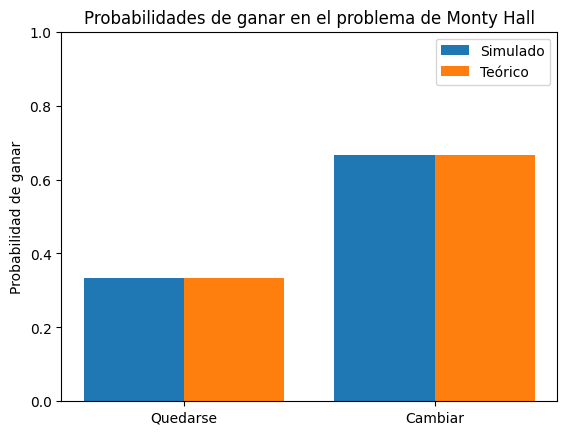

In [11]:
import random as rd
import matplotlib.pyplot as plt

# definir la semilla para los números aleatorios.
rd.seed(2025)

# contadores para las victorias al mantener la puerta y al cambiar.
win_if_switch = 0
win_if_stay = 0
num_simulations = 100000

# ciclo for para la simulación.
for i in range(num_simulations):
    # definir las puertas.
    doors = [0, 0, 0]

    # asignar el premio a una de las puertas.
    rdn = rd.random()
    if rdn < 1/3:
        reward = 0
    elif rdn < 2/3:
        reward = 1
    else:
        reward = 2
    doors[reward] = 1

    # elegir una puerta al azar.
    rdn = rd.random()
    if rdn < 1/3:
        choice = 0
    elif rdn < 2/3:
        choice = 1
    else:
        choice = 2

    # abrir una puerta que no tiene premio y tampoco ha sido elegida.
    doors_to_open = [i for i in range(3) if i != choice and doors[i] == 0]
    if len(doors_to_open) == 1:
        opened_door = doors_to_open[0]
    else:
        rdn = rd.random()
        if rdn < 1/2:
            opened_door = doors_to_open[0]
        else:
            opened_door = doors_to_open[1]

    # definir a que puerta cambiar.
    for i in range(3):
        if i != choice and i != opened_door:
            switch_choice = i
            break

    # aumentar el contador si cambia de puerta.
    if doors[switch_choice] == 1:
        win_if_switch += 1

    # aumentar el contador si se queda con su puerta.
    if doors[choice] == 1:
        win_if_stay += 1

# calcular probabilidades
prob_switch = win_if_switch / num_simulations
prob_stay = win_if_stay / num_simulations

print('Probabilidad de ganar si no se cambia de puerta: ', prob_stay)
print('Probabilidad de ganar si se cambia de puerta: ', prob_switch)

if prob_switch > prob_stay:
    print('Es mejor cambiar de puerta.')
else:
    print('Es mejor quedarse con la puerta elegida.')

# valores teóricos
teoricas = [1/3, 2/3]
simuladas = [prob_stay, prob_switch]
labels = ['Quedarse', 'Cambiar']

# gráfico de barras comparativo
x = range(len(labels))

plt.bar(x, simuladas, width=0.4, label='Simulado', align='center')
plt.bar([i + 0.4 for i in x], teoricas, width=0.4, label='Teórico', align='center')

plt.ylabel('Probabilidad de ganar')
plt.title('Probabilidades de ganar en el problema de Monty Hall')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylim(0, 1)
plt.legend()
plt.show()

**Pregunta 2.** ¿Existe alguna diferencia en la estrategia si en lugar de 3 se tienen 5 puertas (1 con premio y 4 sin premio)?

In [10]:
import random

# Fijar semilla para reproducibilidad
random.seed(2025)

def simular_monty_hall(n_puertas=3, n_simulaciones=100000):
    ganar_si_cambia = 0
    ganar_si_queda = 0

    for _ in range(n_simulaciones):
        puertas = list(range(n_puertas))
        premio = random.choice(puertas)
        eleccion_inicial = random.choice(puertas)

        # El presentador abre todas menos 2 puertas:
        puertas_restantes = [p for p in puertas if p != eleccion_inicial and p != premio]
        puertas_abiertas = random.sample(puertas_restantes, n_puertas - 2)

        # Quedan solo 2 puertas cerradas
        puertas_cerradas = [p for p in puertas if p not in puertas_abiertas]

        # Si el jugador se queda con su elección original
        if eleccion_inicial == premio:
            ganar_si_queda += 1

        # Si el jugador cambia a la otra puerta cerrada
        otra_puerta = [p for p in puertas_cerradas if p != eleccion_inicial][0]
        if otra_puerta == premio:
            ganar_si_cambia += 1

    probabilidad_cambiar = ganar_si_cambia / n_simulaciones
    probabilidad_quedarse = ganar_si_queda / n_simulaciones

    print(f"Con {n_puertas} puertas y {n_simulaciones} simulaciones:")
    print(f"- Probabilidad de ganar si CAMBIA:    {probabilidad_cambiar:.4f}")
    print(f"- Probabilidad de ganar si SE QUEDA: {probabilidad_quedarse:.4f}")

# Prueba con 3 puertas (clásico)
simular_monty_hall(3)

# Prueba con 5 puertas (pregunta 2)
simular_monty_hall(5)

Con 3 puertas y 100000 simulaciones:
- Probabilidad de ganar si CAMBIA:    0.6695
- Probabilidad de ganar si SE QUEDA: 0.3305
Con 5 puertas y 100000 simulaciones:
- Probabilidad de ganar si CAMBIA:    0.8003
- Probabilidad de ganar si SE QUEDA: 0.1997


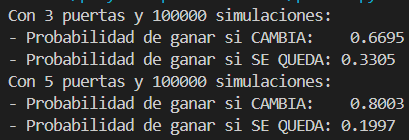

Para responder a la pregunta 2, con base a los resultados obtenidos, **si existe una diferencia significativa, y la estrategia de cambiar de puerta se vuelve aún más ventajosa al aumentar el número de puertas**.

En el caso del problema de Monty Hall clásico con 3 puertas, cambiar de puerta da una probabilidad de ganar del 67% aproximadamente, mientras que quedarse da solo 33%. Por otro lado, con 5 puertas, cambiar mejora la probabilidad de ganar a 80% y quedarse baja a 20%.

**Por ello cuantas más puertas hay, es más probable que se haya elegido mal al principio, y por lo tanto, más conviene cambiar de puerta después de que el presentador elimine opciones incorrectas.**

A continuación se presenta una gráfica para visualizar mejor los resultados:

In [ ]:
import matplotlib.pyplot as plt

def graficar_probabilidades(max_puertas=10, n_simulaciones=100000):
    puertas = list(range(3, max_puertas + 1))
    prob_cambiar = []
    prob_quedarse = []

    for n in puertas:
        ganar_cambia = 0
        ganar_queda = 0

        for _ in range(n_simulaciones):
            premio = random.randint(0, n - 1)
            eleccion = random.randint(0, n - 1)

            restantes = [p for p in range(n) if p != eleccion and p != premio]
            abiertas = random.sample(restantes, n - 2)
            cerradas = [p for p in range(n) if p not in abiertas]

            otra = [p for p in cerradas if p != eleccion][0]
            if eleccion == premio:
                ganar_queda += 1
            if otra == premio:
                ganar_cambia += 1

        prob_quedarse.append(ganar_queda / n_simulaciones)
        prob_cambiar.append(ganar_cambia / n_simulaciones)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(puertas, prob_cambiar, label='Cambiar', marker='o')
    plt.plot(puertas, prob_quedarse, label='Quedarse', marker='x')
    plt.xlabel('Número de puertas')
    plt.ylabel('Probabilidad de ganar')
    plt.title('Probabilidad de ganar según la estrategia (Monty Hall)')
    plt.legend()
    plt.grid(True)
    plt.show()

graficar_probabilidades(10)


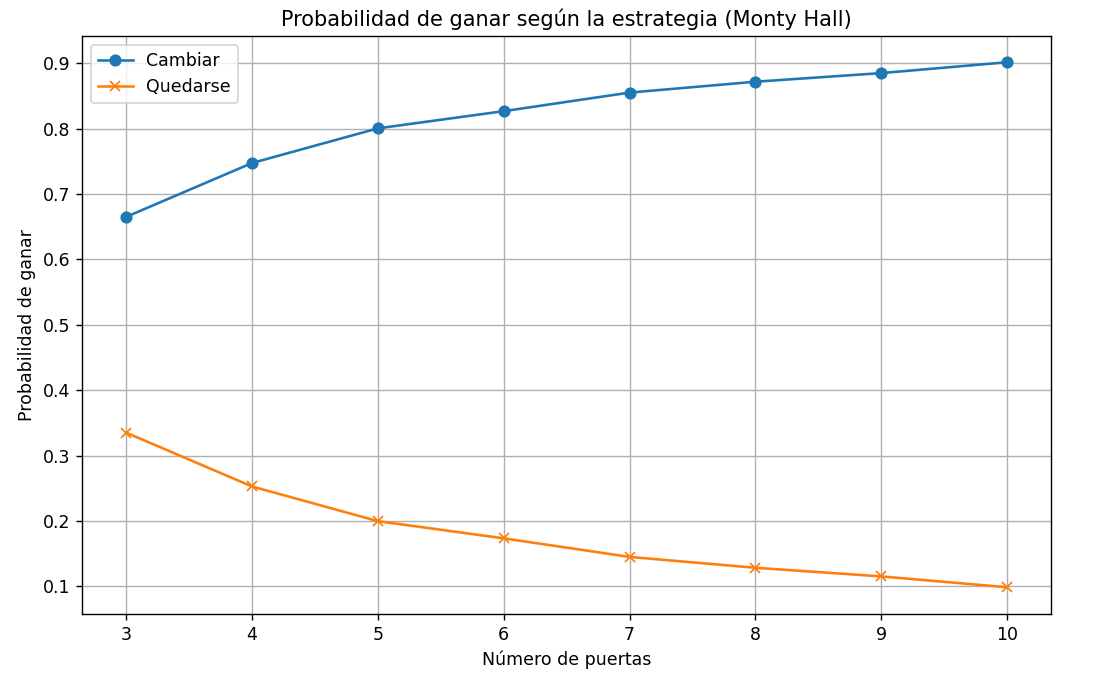

En la gráfica, el eje X, representa el número de puertas en el juego (de 3 a 10), el eje Y es la probabilidad de ganar, la curva azul que es la opción de cambiar de puerta, muestra cómo aumenta la probabilidad de ganar si el consursante cambia de puerta y la curva naranja que es la opción de quedarse, muestra cómo esa probabilidad de ganar disminuye si el concursante se queda con su primera elección.

Por lo tanto, la mejor estrategia es siempre cambiar de puerta después de que el presentador elimine una opción sin premio, ya que al principio las probabilidades de haber elegido la puerta correcta son muy bajas (1/n) y cuando el presentador revela puertas sin premio, esa información adicional hace que la probabilidad de ganar sea mayor en la otra puerta cerrada, aumentando las oportunidades si se cambia.